In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("car_data.csv")

In [3]:
df.head(5)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
df.sample(5)

,buying,maint,doors,persons,lug_boot,safety,class
13,vhigh,vhigh,2,4,med,med,unacc
945,med,vhigh,5more,2,small,low,unacc
1696,low,low,4,more,med,med,good
326,vhigh,low,2,2,small,high,unacc
151,vhigh,high,3,4,big,med,unacc


In [9]:
df.shape

(1728, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [12]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [17]:
df['Car Safety'] = df['safety'].map({'low': 0,'med': 1,'high': 1})

In [19]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class,Car Safety
0,vhigh,vhigh,2,2,small,low,unacc,0
1,vhigh,vhigh,2,2,small,med,unacc,1
2,vhigh,vhigh,2,2,small,high,unacc,1
3,vhigh,vhigh,2,2,med,low,unacc,0
4,vhigh,vhigh,2,2,med,med,unacc,1


In [21]:
df.sample(5)

,buying,maint,doors,persons,lug_boot,safety,class,Car Safety
1711,low,low,5more,4,small,med,acc,1
69,vhigh,vhigh,4,4,big,low,unacc,0
1013,med,high,3,4,med,high,acc,1
169,vhigh,high,4,2,big,med,unacc,1
1628,low,low,2,2,big,high,unacc,1


In [23]:
X_remove = df.drop(columns=['safety', 'Car Safety', 'class'])
y = df['Car Safety']

In [26]:
X_remove

,buying,maint,doors,persons,lug_boot
0,vhigh,vhigh,2,2,small
1,vhigh,vhigh,2,2,small
2,vhigh,vhigh,2,2,small
3,vhigh,vhigh,2,2,med
4,vhigh,vhigh,2,2,med
...,...,...,...,...,...
1723,low,low,5more,more,med
1724,low,low,5more,more,med
1725,low,low,5more,more,big
1726,low,low,5more,more,big


In [29]:
X = pd.get_dummies(X_remove, drop_first=True)

In [30]:
X

,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small
0,False,False,True,False,False,True,False,False,False,False,False,False,True
1,False,False,True,False,False,True,False,False,False,False,False,False,True
2,False,False,True,False,False,True,False,False,False,False,False,False,True
3,False,False,True,False,False,True,False,False,False,False,False,True,False
4,False,False,True,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,True,False,False,True,False,False,False,False,True,False,True,True,False
1724,True,False,False,True,False,False,False,False,True,False,True,True,False
1725,True,False,False,True,False,False,False,False,True,False,True,False,False
1726,True,False,False,True,False,False,False,False,True,False,True,False,False


In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model = LogisticRegression(max_iter=500, C=1.0, penalty='l2', solver='lbfgs')

In [36]:
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

In [39]:
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:,1]

In [40]:
accuracy_score(y_test, y_pred)

0.6676300578034682

In [41]:
precision_score(y_test, y_pred)

0.6676300578034682

In [42]:
recall_score(y_test, y_pred)

1.0

In [43]:
f1_score(y_test, y_pred)

0.8006932409012132

In [44]:
roc_auc_score(y_test, y_proba)

0.39412761151891584

In [45]:
confusion_matrix(y_test, y_pred)

array([[  0, 115],
       [  0, 231]])

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       115
           1       0.67      1.00      0.80       231

    accuracy                           0.67       346
   macro avg       0.33      0.50      0.40       346
weighted avg       0.45      0.67      0.53       346



C:\Users\Suresh DS\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Suresh DS\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Suresh DS\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{me

In [48]:
import matplotlib.pyplot as plt

In [49]:
feature_names = X.columns
coefs = model.coef_[0]

In [50]:
feature_coef = pd.Series(coefs, index=feature_names).sort_values()

In [53]:
print(feature_coef)

buying_low       -0.025949
maint_med        -0.023055
buying_vhigh     -0.009316
buying_med       -0.008399
doors_3          -0.007856
maint_low        -0.004895
persons_more     -0.002536
persons_4         0.006819
maint_vhigh       0.006855
lug_boot_small    0.032316
lug_boot_med      0.039014
doors_5more       0.050035
doors_4           0.081277
dtype: float64


In [54]:
feature_coef.tail(5)

maint_vhigh       0.006855
lug_boot_small    0.032316
lug_boot_med      0.039014
doors_5more       0.050035
doors_4           0.081277
dtype: float64

In [55]:
feature_coef.head(5)

buying_low     -0.025949
maint_med      -0.023055
buying_vhigh   -0.009316
buying_med     -0.008399
doors_3        -0.007856
dtype: float64

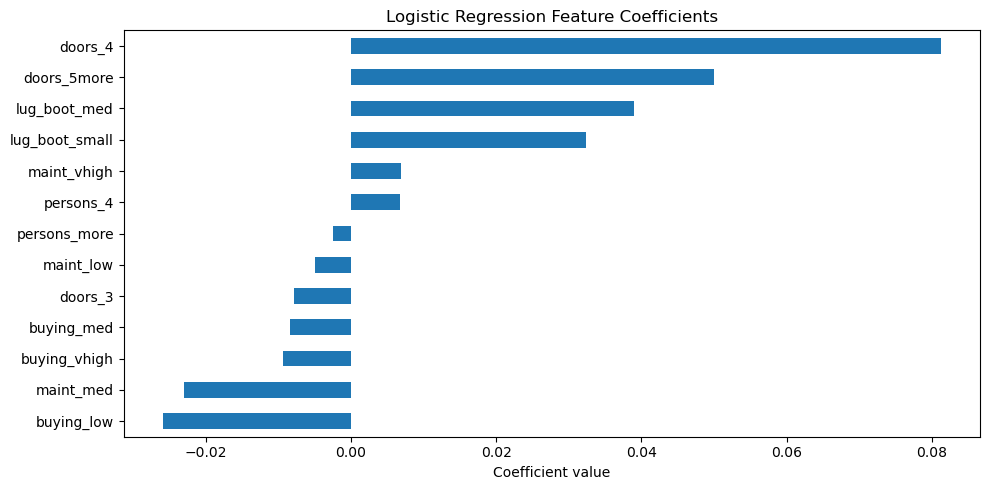

In [56]:
plt.figure(figsize=(10,5))
feature_coef.sort_values().plot(kind='barh')
plt.title('Logistic Regression Feature Coefficients')
plt.xlabel('Coefficient value')
plt.tight_layout()
plt.show()

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
param_grid = {'C':[0.01, 0.1, 1, 10], 'penalty':['l1','l2'], 'solver':['liblinear']}
grid = GridSearchCV(LogisticRegression(max_iter=500), param_grid, scoring='f1', cv=5)

In [59]:
grid.fit(X_train_scaled, y_train)

,estimator,LogisticRegre...(max_iter=500)
,param_grid,"{'C': [0.01, 0.1, ...], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}"
,scoring,'f1'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [60]:
grid.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

In [61]:
grid.best_score_

np.float64(0.799826088589646)

In [62]:
best_model = grid.best_estimator_
best_model.fit(X_train_scaled, y_train)

,penalty,'l1'
,dual,False
,tol,0.0001
,C,0.01
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,500
,multi_class,'deprecated'


In [64]:
f1_score(y_test, best_model.predict(X_test_scaled))

0.8006932409012132

In [65]:
accuracy_score(y_test, y_pred)

0.6676300578034682

In [66]:
import joblib

In [68]:
joblib.dump(best_model, "car_safety_model.pkl")
joblib.dump(scaler, "car_safety_scaler.pkl")
joblib.dump(list(X.columns), "car_safety_feature_columns.pkl")

['car_safety_feature_columns.pkl']